All code was hidden but the main benchmark function. Outputs remain.

2024-11-22 10:30:15,226 [WARNING] SpaCy Pipeline Components: ['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']
2024-11-22 10:30:15,741 [WARNING] Successfully connected to Neo4j.
2024-11-22 10:30:15,741 [WARNING] Fetching all models and their embeddings from Neo4j...
2024-11-22 10:30:16,833 [WARNING] Fetched 991 models from Neo4j.
2024-11-22 10:30:16,864 [WARNING] Number of models after removing empty embeddings: 991
2024-11-22 10:30:41,684 [WARNING] Training bigram model for phrase extraction...
2024-11-22 10:30:42,147 [WARNING] Bigram model trained successfully.
Extracting keywords using BERT-based extractor...


Extracting Keywords with BERT: 100%|██████████| 991/991 [03:00<00:00,  5.49it/s]


Completed BERT-based keyword extraction.
2024-11-22 10:34:19,500 [WARNING] Extracting named entities and combining with keywords...

Benchmarking for Similarity Aspect: SIMILAR_TAGS_NONAI
--------------------------------------------------
Selecting 100 target models for benchmarking...
Selected 100 target models.


Processing SIMILAR_TAGS_NONAI: 100%|██████████| 100/100 [00:23<00:00,  4.27it/s]



Benchmarking for Similarity Aspect: SIMILAR_TAGS_AI
--------------------------------------------------
Selecting 100 target models for benchmarking...
Selected 100 target models.


Processing SIMILAR_TAGS_AI: 100%|██████████| 100/100 [00:22<00:00,  4.35it/s]



Benchmarking for Similarity Aspect: SIMILAR_SUMMARY_NONAI
--------------------------------------------------
Selecting 100 target models for benchmarking...
Selected 100 target models.


Processing SIMILAR_SUMMARY_NONAI: 100%|██████████| 100/100 [00:23<00:00,  4.27it/s]



Benchmarking for Similarity Aspect: SIMILAR_SUMMARY_AI
--------------------------------------------------
Selecting 100 target models for benchmarking...
Selected 100 target models.


Processing SIMILAR_SUMMARY_AI: 100%|██████████| 100/100 [00:21<00:00,  4.60it/s]



Benchmarking for Similarity Aspect: SIMILAR_NAMES
--------------------------------------------------
Selecting 100 target models for benchmarking...
Selected 100 target models.


Processing SIMILAR_NAMES: 100%|██████████| 100/100 [00:21<00:00,  4.58it/s]



=== Aggregated Benchmarking Results ===

    similarity_aspect  num_keywords  exact_match_ratio  synonym_ratio  trials  TP_sum  FP_sum  FN_sum  TN_sum  Accuracy_avg  Precision_avg  Recall_avg  F1_Score_avg  MRR_avg  NDCG_avg
        SIMILAR_NAMES             1                0.7            0.3      81      37    4013      44   76177      0.949459       0.009136    0.456790      0.017913 0.157801  0.143394
        SIMILAR_NAMES             3                0.7            0.3     100     100    4900       0   94100      0.950555       0.020000    1.000000      0.039216 0.737601  0.568253
        SIMILAR_NAMES             5                0.7            0.3     100     100    4900       0   94100      0.950555       0.020000    1.000000      0.039216 0.920572  0.753086
        SIMILAR_NAMES             7                0.7            0.3     100     100    4900       0   94100      0.950555       0.020000    1.000000      0.039216 0.962857  0.777181
   SIMILAR_SUMMARY_AI             1   

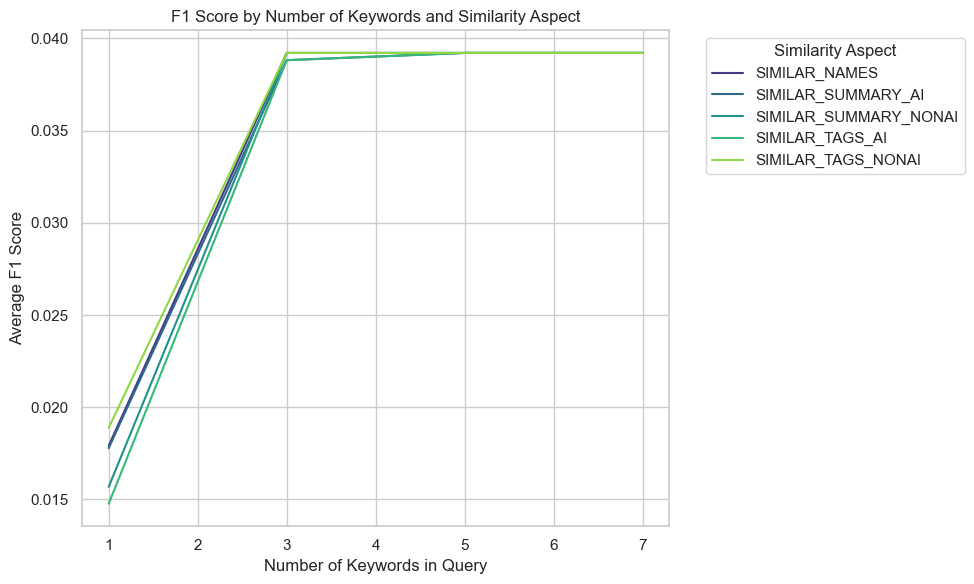

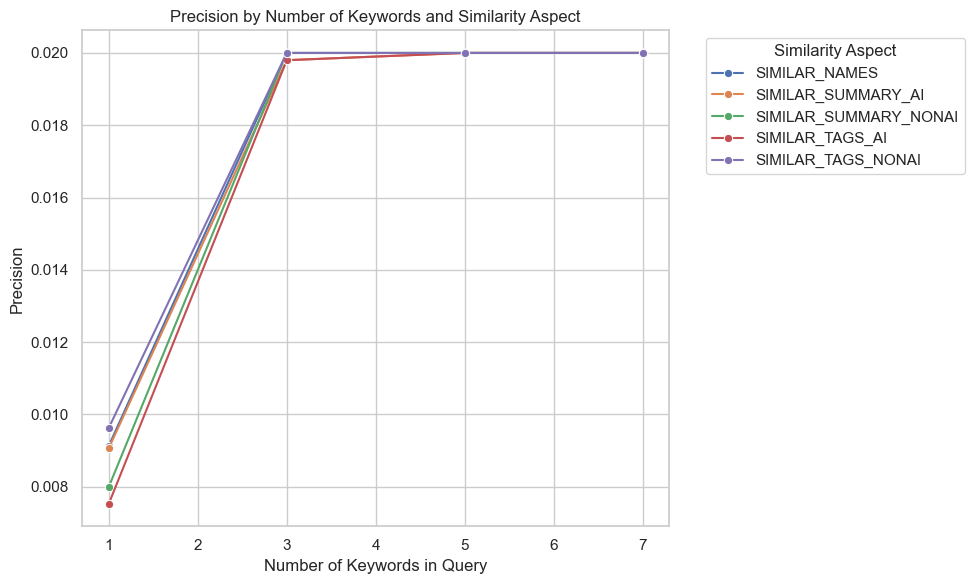

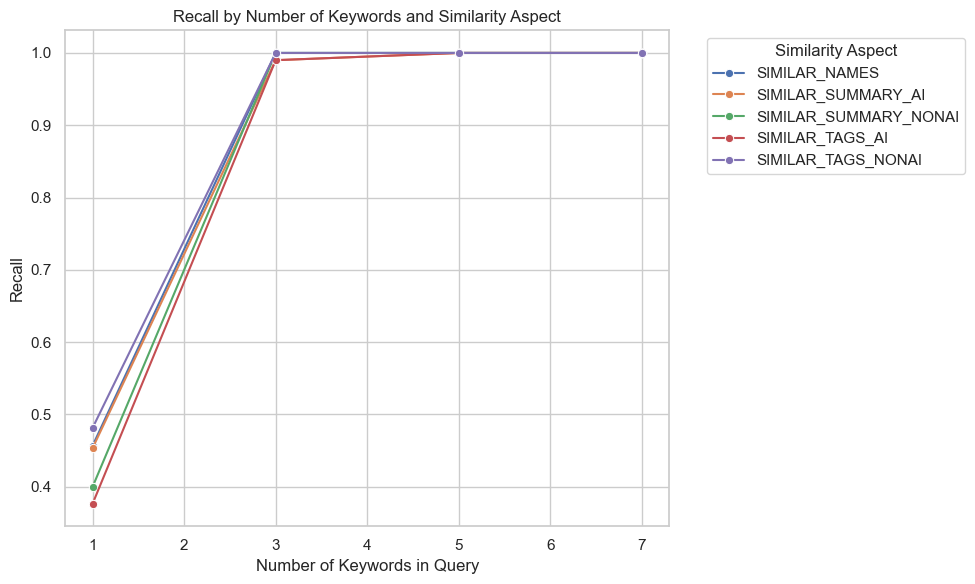

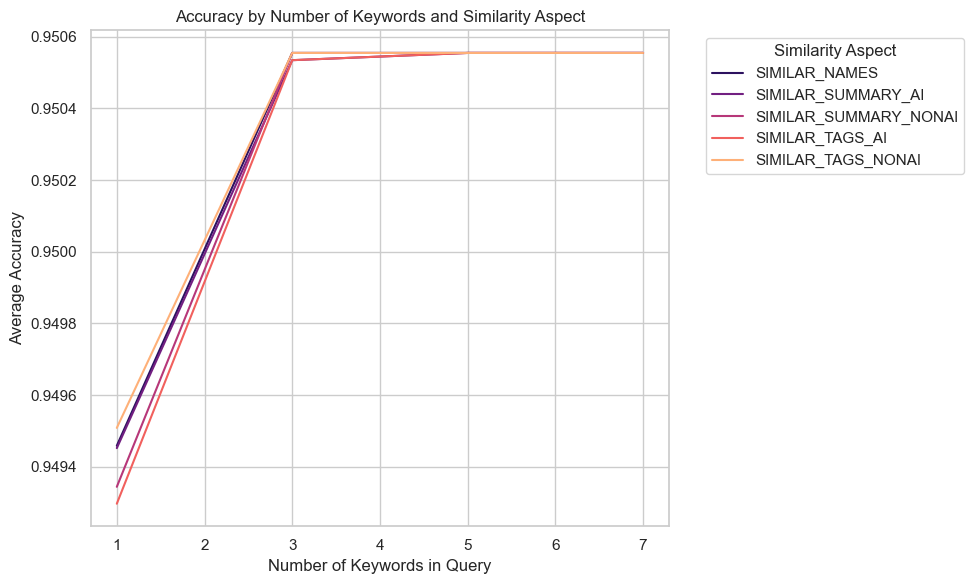

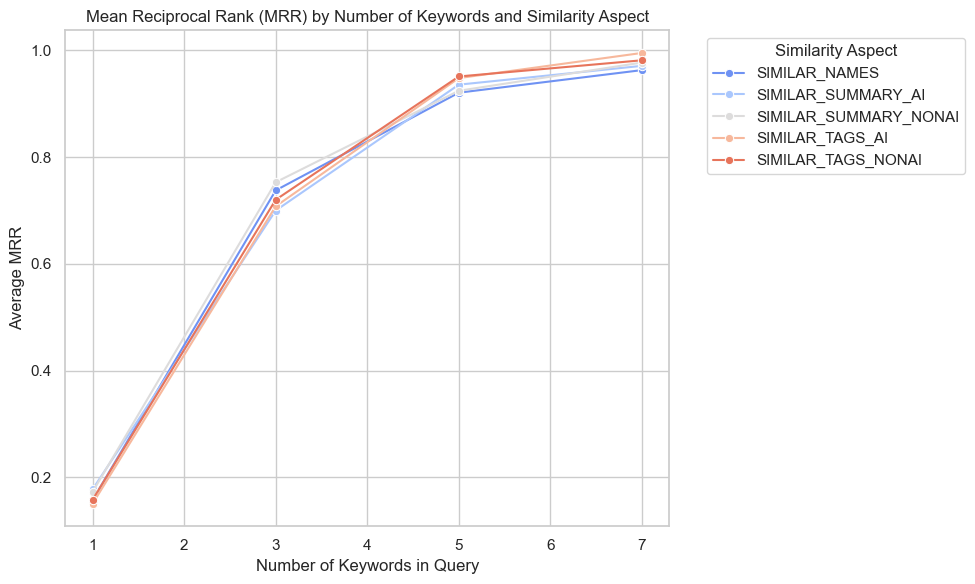

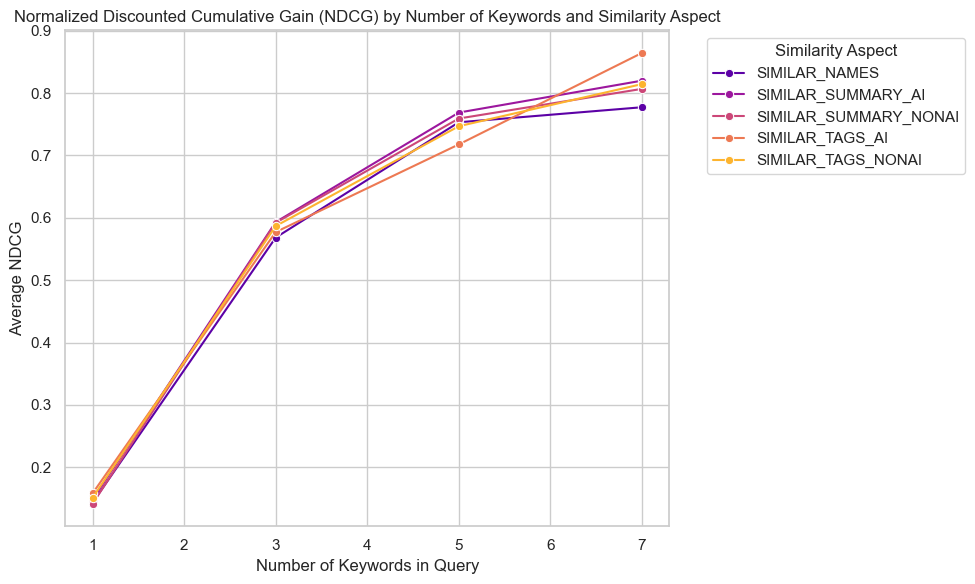


Benchmarking Completed Successfully.
Refer to the displayed results and generated plots for detailed insights.


In [15]:
# def main():
#     graph_db = connect_to_neo4j(NEO4J_URI, NEO4J_USER, NEO4J_PASSWORD)
# 
#     df_models = fetch_all_models(graph_db)
# 
#     similarity_aspects = {
#         'SIMILAR_TAGS_NONAI': ['tags_nonai'],
#         'SIMILAR_TAGS_AI': ['tags_ai'],
#         'SIMILAR_SUMMARY_NONAI': ['description_nonai'],
#         'SIMILAR_SUMMARY_AI': ['description_ai'],
#         'SIMILAR_NAMES': ['name']
#     }
# 
#     combined_texts = []
#     for aspect, fields in similarity_aspects.items():
#         combined_text_column = f'combined_text_{aspect}'
#         df_models[combined_text_column] = df_models[fields].fillna('').astype(str).agg(' '.join, axis=1).apply(
#             lambda x: preprocess_text(x, phraser=None, training=True))
#         combined_texts.extend(df_models[combined_text_column].tolist())
# 
#     logging.warning("Training bigram model for phrase extraction...")
#     phraser = train_bigram_model(combined_texts)
#     logging.warning("Bigram model trained successfully.")
# 
#     for aspect, fields in similarity_aspects.items():
#         combined_text_column = f'combined_text_{aspect}'
#         df_models[combined_text_column] = df_models[fields].fillna('').astype(str).agg(' '.join, axis=1).apply(
#             lambda x: preprocess_text(x, phraser, training=False))
# 
#     df_models['processed_description'] = df_models[['description_nonai', 'description_ai']].fillna('').agg(' '.join, axis=1).apply(
#         lambda x: preprocess_text(x, phraser))
# 
#     embedding_model = SentenceTransformer('all-MiniLM-L6-v2')
#     df_models = extract_keywords_with_bert(df_models, embedding_model, top_n=10)
# 
#     NUM_TRIALS = 100
#     KEYWORD_COUNTS = [1, 3, 5, 7]
#     TOP_K = 50
#     SYNONYM_RATIO = 0.3
#     RANDOM_SEED = 42
# 
#     df_queries = run_benchmark(
#         df=df_models,
#         similarity_aspects=similarity_aspects,
#         tfidf_vectorizers=None,
#         phraser=phraser,
#         num_trials=NUM_TRIALS,
#         top_k=TOP_K,
#         keyword_counts=KEYWORD_COUNTS,
#         synonym_ratio=SYNONYM_RATIO,
#         random_seed=RANDOM_SEED
#     )
# 
#     df_aggregated_metrics = aggregate_metrics(df_queries)
# 
#     display_results(df_aggregated_metrics)
# 
#     visualize_metrics(df_aggregated_metrics)
# 
#     print("\nBenchmarking Completed Successfully.")
#     
# if __name__ == "__main__":
#     main()


Based on these graphs, it seems like 3 keywords is adequate. However, for things like ncdg or mrr, more keywords is better. Also, for slightly better results, 5 keywords can be used.